In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
from importlib import import_module


from matplotlib import pyplot as plt
from PIL import Image
from PIL import Image, ImageDraw, ImageFont

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean


# This is needed to display the images.
%matplotlib inline

In [2]:
# Data Path
DATADIR = '/Users/yanxiang.zyx/KIPRO/associative_deep_clustering/semisup/data/npy/'

In [3]:
# Plot images and put a text label on it
def draw_text(np_img, message):
    image = Image.fromarray(np_img)
    draw = ImageDraw.Draw(image)
    (x, y) = (5, 5)
    color = 'rgb(255, 0, 0)' # black color
    draw.text((x, y), message, fill=color)
    return image

# resize image
def show_resize_effect(image, size):
    image_resized = resize(image, size, anti_aliasing=True)
    plt.figure(figsize=(5, 5))
    plt.imshow(image_resized)
    plt.figure(figsize=(5, 5))
    plt.imshow(image)

def load_images():
    return np.load(DATADIR + 'X_new.npy').astype('uint8')

def load_labels():
    labels = np.load(DATADIR + 'Y.npy')
    arr = np.arange(1,6)
    return labels.dot(arr).astype('uint8')
    

In [4]:
images = load_images()
labels = load_labels()

# 100 dataset
label_map_100 = {
    1: 'Cardboard',
    2: 'Empty',
    3: 'Shredded Paper',
    4: 'Pamphlet',
    5: 'Plastic Foil'
}

# 500 dataset
label_map_500 = {
    1: 'Cardboard',
    2: 'Pamphlet',
    3: 'Empty',
    4: 'Plastic Foil',
    5: 'Shredded Paper'
}

print(images.shape)
print(labels.shape)

(500, 227, 227, 3)
(500,)


In [5]:
def rearrange_order_label_map_500():
    Cardboard = images[0:100]
    Pamphlet = images[300:400]
    Empty = images[100:200]
    Plastic_Foil = images[400:500]
    Shredded_Paper = images[200:300]

    new_order = np.concatenate((Cardboard, Pamphlet,Empty, Plastic_Foil, Shredded_Paper), axis=0)
    print(new_order.shape)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel-5.1.1-py3.6.egg/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


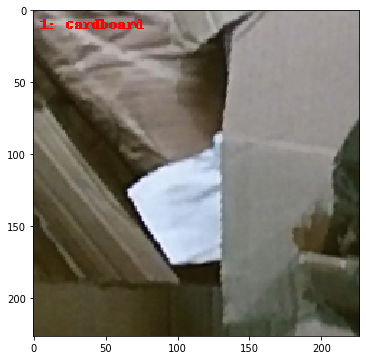

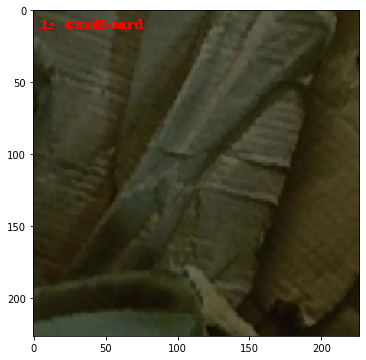

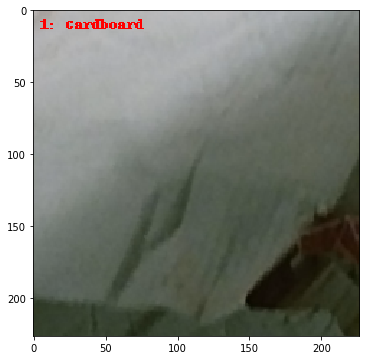

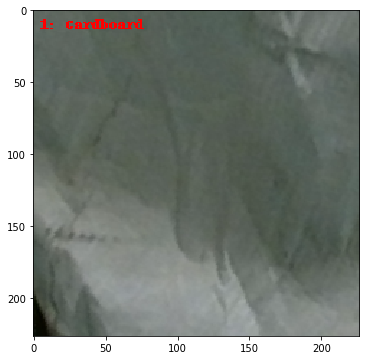

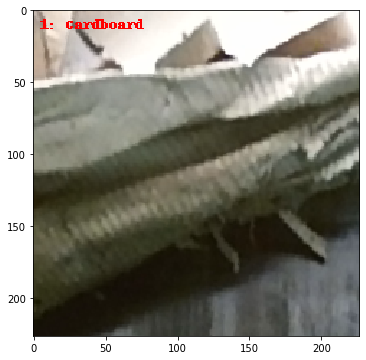

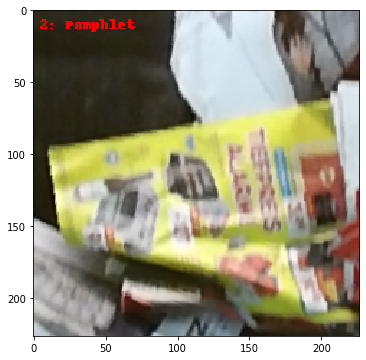

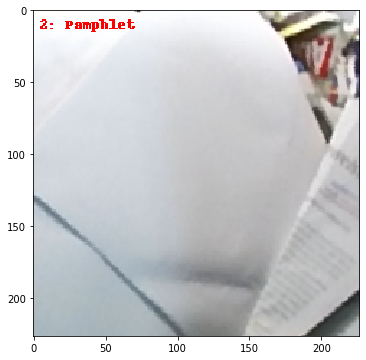

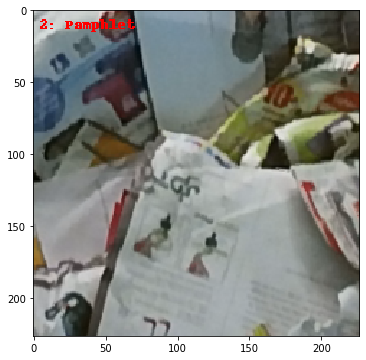

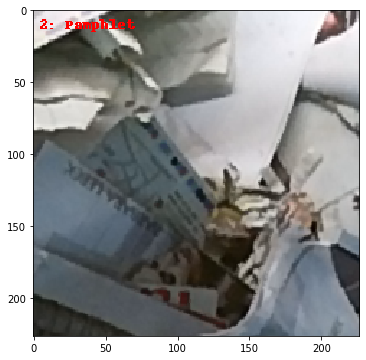

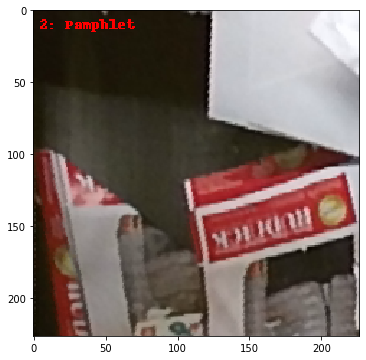

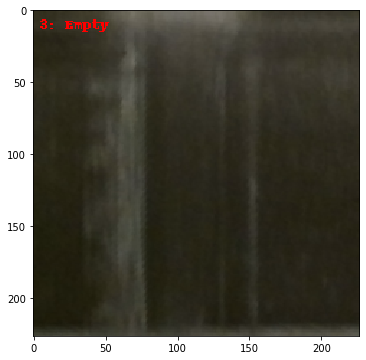

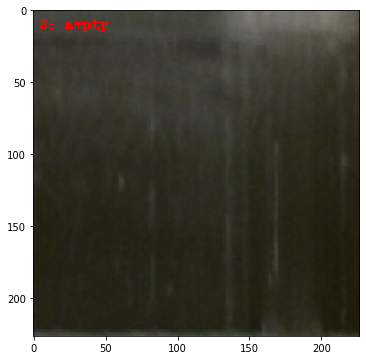

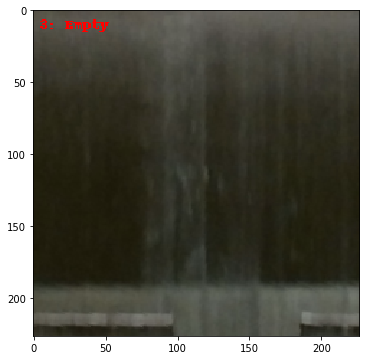

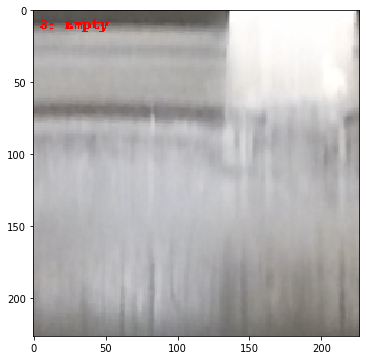

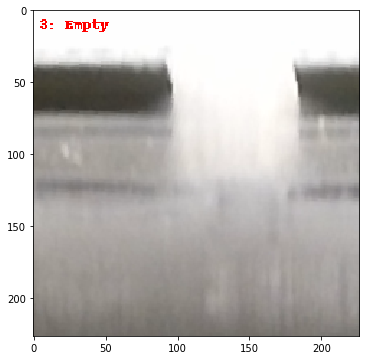

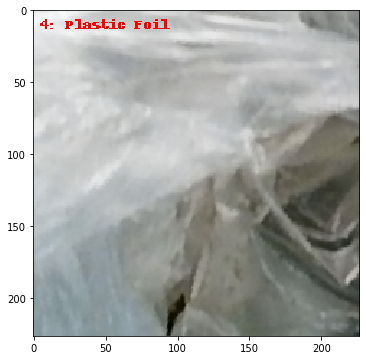

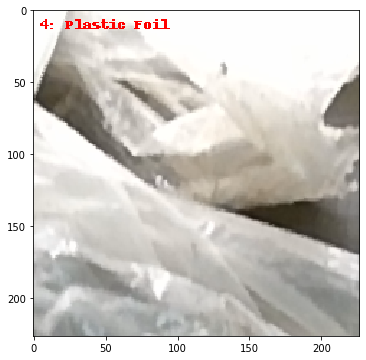

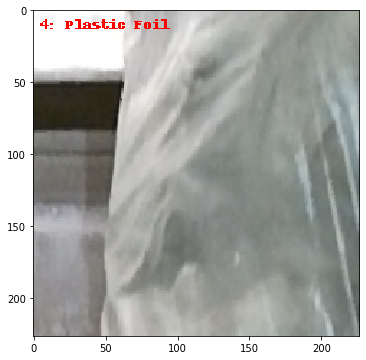

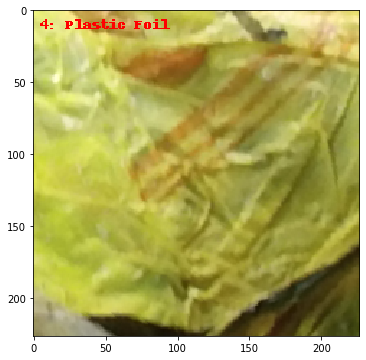

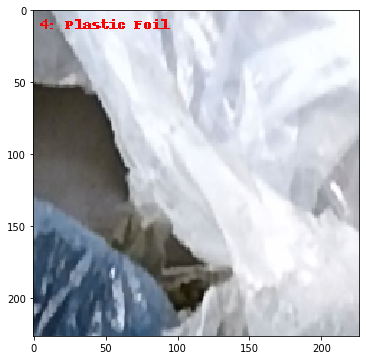

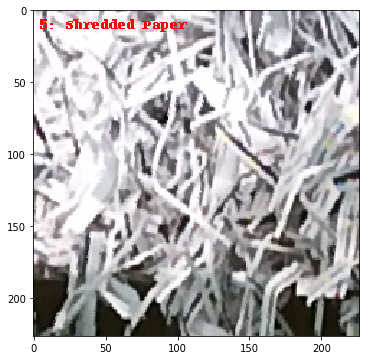

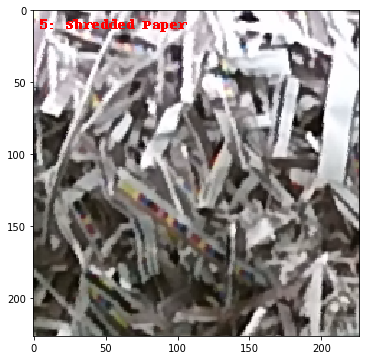

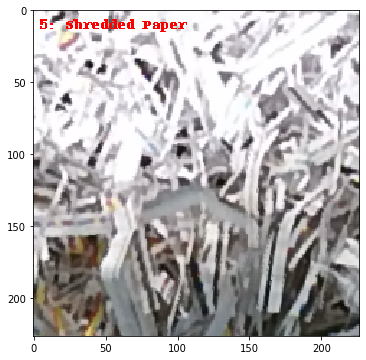

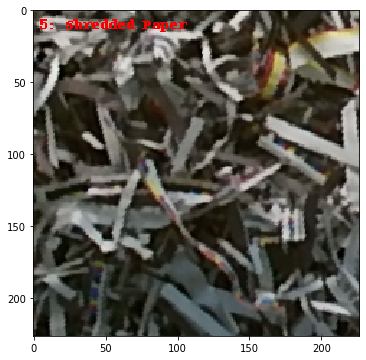

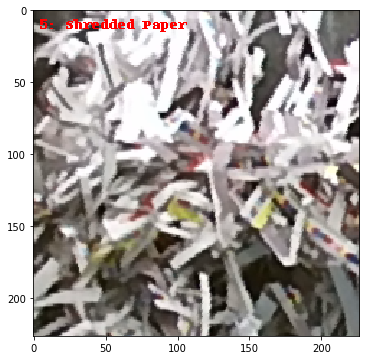

In [10]:
disply_images_per_class = 5
num_class = 5
total_image_per_class = images.shape[0] // num_class
for i in range(0, num_class):
    for j in range(0, disply_images_per_class):
        img_index = i * total_image_per_class + j
        img = images[img_index]
        label = labels[img_index]
        img = draw_text(img,  str(label) + ": " + label_map_500[label] )
        plt.figure(figsize=(6, 6))
        plt.imshow(img)

In [15]:
# np.save(DATADIR + 'X_new.npy', new_order)

In [16]:
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 